## **PROYEK PERTAMA MACHINE LEARNING TERAPAN**
## **Membuat Model Predictive Analytics**
## **Studi Kasus : Prediksi Harga Mobil Bekas BMW**
# Nama : Addina Dwi Nugroho
# Email : addin27nugroho@gmail.com

### **Tahap 1 : Data Loading**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

from google.colab import drive

import zipfile, os

In [2]:
#sambung google colab ke google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#ekstrak dataset yang masih berformat zip
local_zip = '/content/drive/My Drive/dataset/100,000 UK Used Car Data set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/100,000 UK Used Car Data set')
zip_ref.close()

In [4]:
#definisikan direktori dataset
base_dir = '/tmp/100,000 UK Used Car Data set'
print(os.listdir(base_dir)) #cek list direktori dataset

['audi.csv', 'focus.csv', 'toyota.csv', 'hyundi.csv', 'bmw.csv', 'vauxhall.csv', 'skoda.csv', 'vw.csv', 'unclean cclass.csv', 'merc.csv', 'cclass.csv', 'unclean focus.csv', 'ford.csv']


In [5]:
#baca dataset
df = pd.read_csv("/tmp/100,000 UK Used Car Data set/bmw.csv")

In [6]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


##### Dokumentasi:
##### - Ada 10781 baris (records) dalam dataset
##### - Terdapat 9 kolom yaitu: model, year, price, transmission, mileage, fuelType, tax, mpg, engineSize

### **Tahap 2 : Deskripsi Variabel**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


##### Dari output terlihat bahwa:

##### -Terdapat 3 kolom dengan tipe object, yaitu: model, transmission, dan fuelType. Kolom ini merupakan categorical features (fitur non-numerik).
##### -Terdapat 5 kolom numerik dengan tipe data float64 dan int64 yaitu: year, mileage, tax, mpg, engineSize.
##### -Terdapat 1 kolom numerik dengan tipe data int64, yaitu: price. Kolom ini merupakan target fitur.

In [8]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


### **Tahap 3 : Handling Missing Value**
##### Dari hasil fungsi describe(), nilai minimum tax dan engineSize adalah 0. Patut diduga bahwa ini merupakan data yang tidak valid atau sering disebut missing value. Missing value harus diatasi agar data menjadi valid

In [9]:
x = (df.tax == 0).sum()
y = (df.engineSize == 0).sum()
 
print("Nilai 0 di kolom tax ada: ", x)
print("Nilai 0 di kolom engineSize ada: ", y)

Nilai 0 di kolom tax ada:  340
Nilai 0 di kolom engineSize ada:  47


##### Karena jumlah sampel missing value cukup sedikit (3%), maka sampel yang memiliki missing value dihapus saja

In [10]:
# Drop baris dengan nilai 'tax', dan 'engineSize' = 0
df = df.loc[(df[['tax','engineSize']]!=0).all(axis=1)]
 
# Cek ukuran data untuk memastikan baris sudah di-drop
df.shape

(10419, 9)

In [11]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10419.000000,10419.000000,10419.000000,10419.000000,10419.000000,10419.000000
mean,2017.117574,23012.136193,24892.416547,135.976581,53.514800,2.192341
std,2.370407,11440.603347,25018.375077,57.519049,16.031416,0.532904
min,1996.000000,1200.000000,1.000000,20.000000,5.500000,0.600000
25%,2016.000000,15000.000000,5336.000000,145.000000,44.800000,2.000000
50%,2017.000000,20875.000000,17280.000000,145.000000,52.300000,2.000000
75%,2019.000000,27995.000000,37276.500000,145.000000,61.400000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


### **Tahap 4 : Handling Outliers**
##### deteksi outliers pada fitur numerik dengan teknik visualisasi data (boxplot)

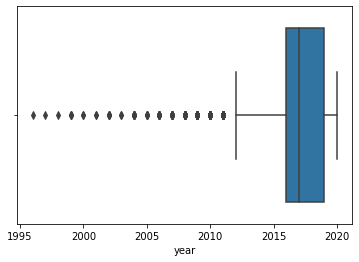

In [12]:
sns.boxplot(x=df['year'])

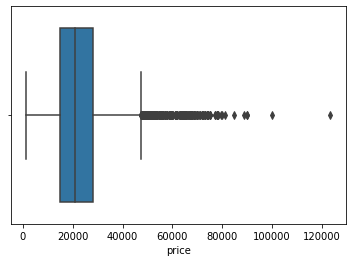

In [13]:
sns.boxplot(x=df['price'])

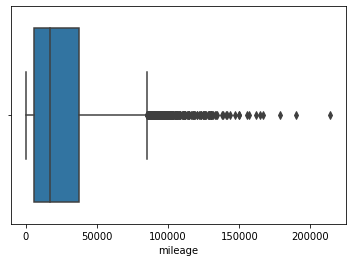

In [14]:
sns.boxplot(x=df['mileage'])

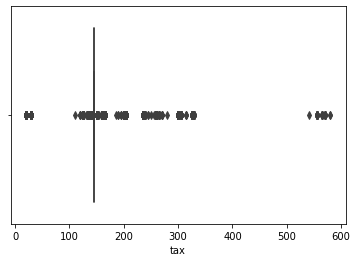

In [15]:
sns.boxplot(x=df['tax'])

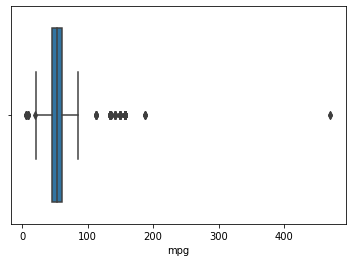

In [16]:
sns.boxplot(x=df['mpg'])

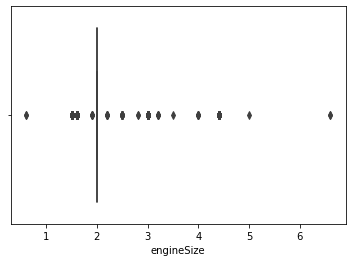

In [17]:
sns.boxplot(x=df['engineSize'])

In [18]:
#tangani outliers dengan teknik IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
df.shape

(3252, 9)

### **Tahap 5 : Univariate Analysis**
##### Analisis data dengan teknik Univariate EDA

In [19]:
#Bagi fitur menjadi 2
categorical_features = ['model', 'transmission', 'fuelType']
numerical_features = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']


##### Categorical Features

           jumlah sampel  persentase
 3 Series            826        25.4
 4 Series            418        12.9
 2 Series            412        12.7
 5 Series            359        11.0
 X1                  298         9.2
 1 Series            291         8.9
 X3                  285         8.8
 X2                  242         7.4
 Z4                   57         1.8
 X4                   50         1.5
 6 Series             11         0.3
 X5                    3         0.1


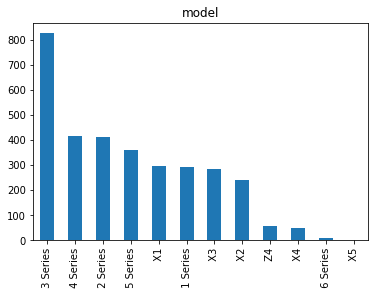

In [20]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df1)
count.plot(kind='bar', title=feature)

           jumlah sampel  persentase
Semi-Auto           1850        56.9
Automatic           1055        32.4
Manual               347        10.7


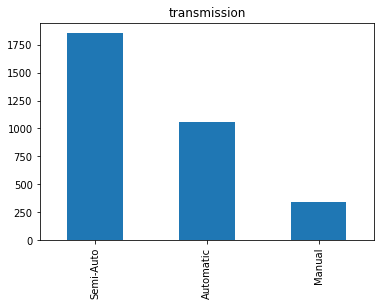

In [21]:
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df1)
count.plot(kind='bar', title=feature)

        jumlah sampel  persentase
Diesel           2256        69.4
Petrol            964        29.6
Hybrid             32         1.0


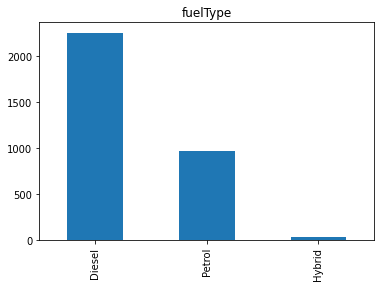

In [22]:
feature = categorical_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df1)
count.plot(kind='bar', title=feature)

##### Numerical Features

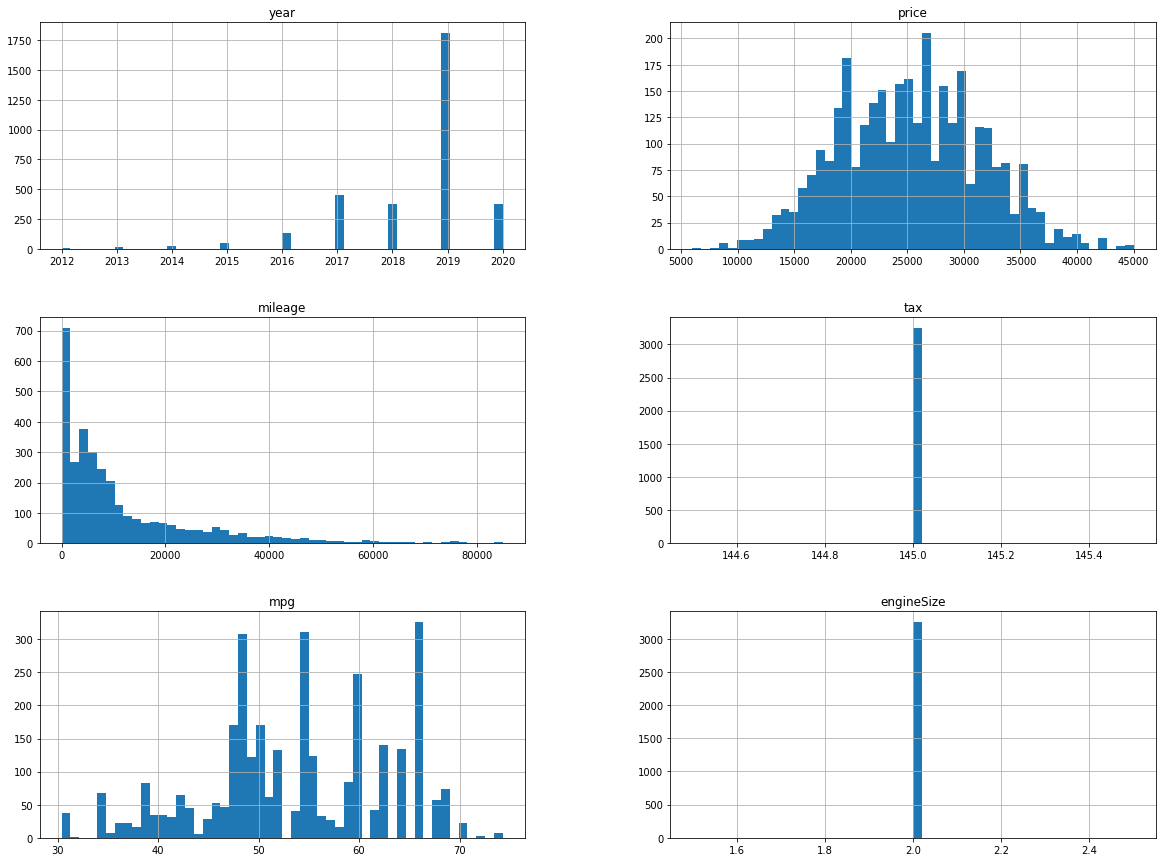

In [23]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### **Tahap 6 : Multivariate Analysis**
##### Analisis data dengan teknik Multivariate EDA untuk menunjukkan hubungan antar dua variabel atau lebih

##### Categorical Features

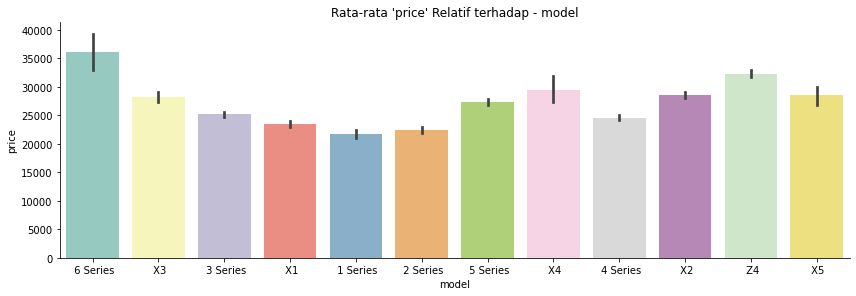

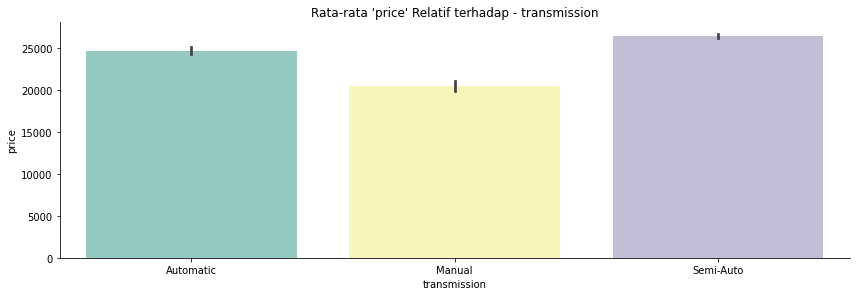

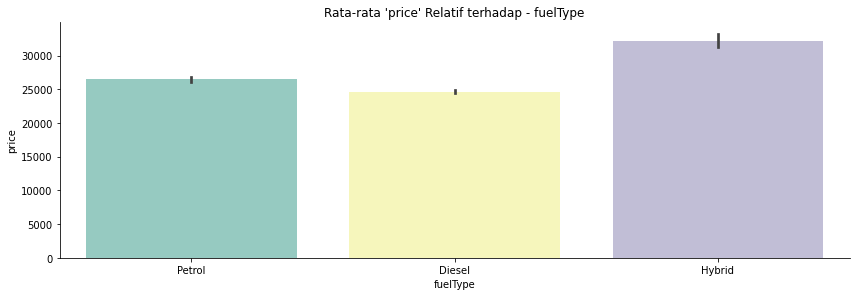

In [24]:
cat_features = df.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

##### Numerical Features

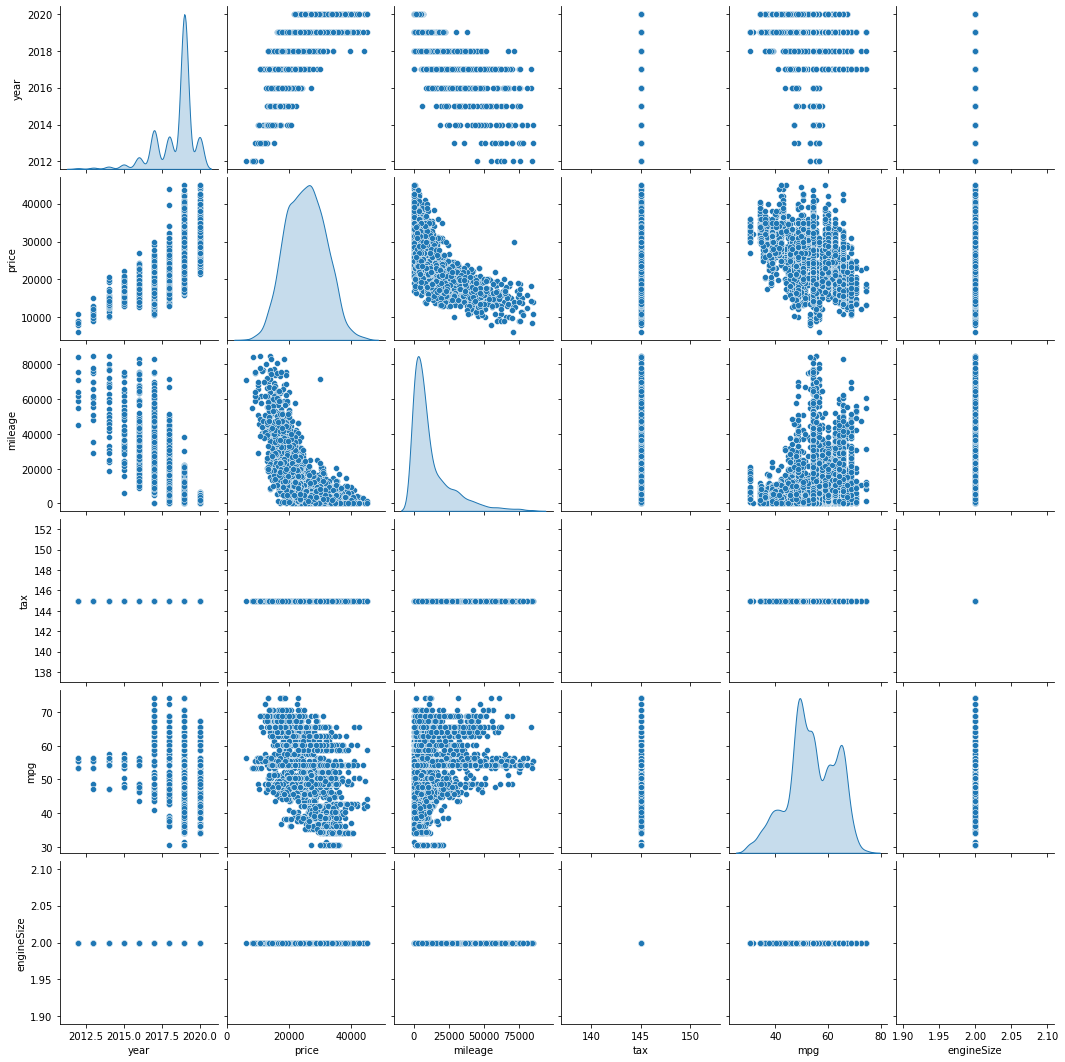

In [25]:
# mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

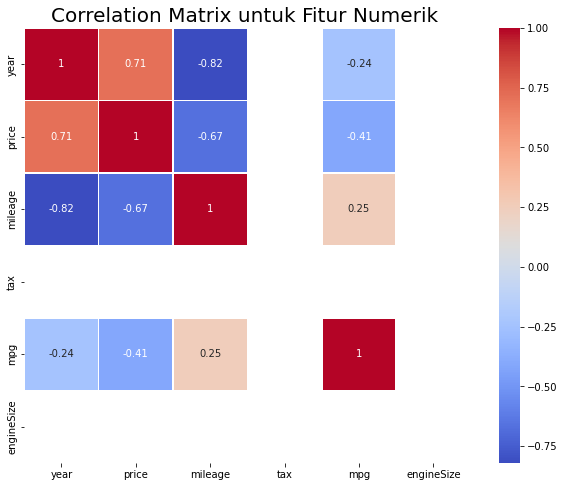

In [26]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

##### Dari grafik, dapat disimpulkan bahwa fitur ‘tax' dan 'engineSize' tidak memiliki korelasi. Sehingga, fitur tersebut dapat di-drop

In [27]:
df.drop(['tax','engineSize'], inplace=True, axis=1)
df.head()

,model,year,price,transmission,mileage,fuelType,mpg
1,6 Series,2018,27000,Automatic,14827,Petrol,42.8
10,X3,2017,15500,Manual,74907,Diesel,52.3
14,X3,2017,22000,Automatic,19057,Diesel,54.3
26,3 Series,2019,17800,Automatic,22310,Diesel,64.2
38,X1,2017,18900,Automatic,33514,Diesel,60.1


### **Tahap 7 : Data Preparation**

##### Encoding Fitur Kategori

In [28]:
from sklearn.preprocessing import  OneHotEncoder
df = pd.concat([df, pd.get_dummies(df['model'], prefix='model', drop_first=True)],axis=1)
df = pd.concat([df, pd.get_dummies(df['transmission'], prefix='transmission', drop_first=True)],axis=1)
df = pd.concat([df, pd.get_dummies(df['fuelType'], prefix='fuelType', drop_first=True)],axis=1)
df.drop(['model','transmission','fuelType'], axis=1, inplace=True)
df.head()

,year,price,mileage,mpg,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,model_ X1,model_ X2,model_ X3,model_ X4,model_ X5,model_ Z4,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol
1,2018,27000,14827,42.8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
10,2017,15500,74907,52.3,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
14,2017,22000,19057,54.3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
26,2019,17800,22310,64.2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
38,2017,18900,33514,60.1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


##### Train Test Split

In [29]:
from sklearn.model_selection import train_test_split
 
X = df.drop(["price"],axis =1)
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [30]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 3252
Total # of sample in train dataset: 2601
Total # of sample in test dataset: 651


##### Standarisasi 

In [31]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['year', 'mileage', 'mpg']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,year,mileage,mpg
8858,-1.902166,1.522429,0.074105
5879,0.444119,-0.564404,-1.577608
5540,0.444119,-0.230927,-0.144665
1924,0.444119,-0.408612,0.194429
7264,-1.120071,0.454116,0.435076


In [32]:
X_train[numerical_features].describe().round(4)

,year,mileage,mpg
count,2601.0000,2601.0000,2601.0000
mean,-0.0000,-0.0000,-0.0000
std,1.0002,1.0002,1.0002
min,-5.0305,-0.8216,-2.5402
25%,-0.3380,-0.6581,-0.5385
50%,0.4441,-0.3716,0.0741
75%,0.4441,0.2760,0.7085
max,1.2262,4.8518,2.2618


### **Tahap 8 : Model Development**

##### Model Development dengan K-Nearest Neighbor

In [33]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [34]:
from sklearn.neighbors import KNeighborsRegressor
 
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_train)

##### Model Development dengan Random Forest

In [35]:
# Impor library yang dibutuhkan
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=30, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

##### Model Development dengan Boosting Algorithm

In [36]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(n_estimators=30, learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

### **Tahap 9 : Evaluasi Model**

In [37]:
## Scale our numerical features so they have zero mean and a variance of one
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [38]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
mse

,train,test
KNN,5018.14,6205.27
RF,1555.12,6409.95
Boosting,13339.5,13871.7


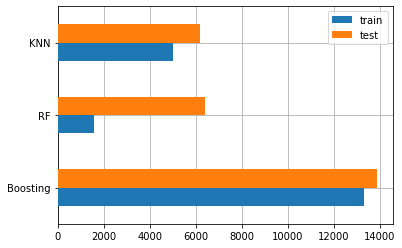

In [39]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

##### Dari grafik, dapat disimpulkan model KNN memberikan nilai eror yang paling kecil. Model inilah yang akan kita pilih sebagai model terbaik untuk melakukan prediksi harga mobil

In [40]:
#uji prediksi
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
9717,28348,30359.4,31303.3,30004.8
